$\newcommand\indi[1]{{\mathbf 1}_{\displaystyle #1}}$
$\newcommand\inde[1]{{\mathbf 1}_{\displaystyle\left\{ #1 \right\}}}$
$\newcommand{\ind}{\inde}$
$\newcommand\E{{\mathbf E}}$
$\newcommand\Cov{{\mathrm Cov}}$
$\newcommand\Var{{\mathrm Var}}$

# **<center>Décision dans l'incertain: </center>**


## <center> La théorie du portefeuille de Markowitz </center>

<table class="tfo-notebook-buttons" align="center">
  <td>
    <a target="_blank" href="https://cermics.enpc.fr/~bl/decision-incertain/index.html">
    <img src="https://drive.google.com/uc?export=view&id=1imN5f8xXJGvsFT7nsFiFfg-Uk4y3sxgo" width="60" height="70"/>
    Page du cours</a>
</td>

 <td>
    <a target="_blank" href="https://drive.google.com/file/d/1cr0sFDZIOAVYl-gEwF41og10xlI9KmRC/view?usp=sharing">
    <img src="https://drive.google.com/uc?export=view&id=1mCoEjoX14qqcPIq221D-MB9bXAfT9d6m" width="60" height="70"/>
    Colab</a>
  </td>
    
  <td>
    <a href="https://cermics.enpc.fr/~bl/decision-incertain/td-0/TD0.ipynb?refresh=echo%20rand(2,200)"><img   src="https://drive.google.com/uc?export=view&id=1xxaBqICUG2bV4sXsMDfK4MR-y2Zcgd3z" width="60" height="70">Télécharger le Jupyter</a>
  </td>
</table>

# 1. Introduction

On considere $d$ actifs dont les rendements sont donnés par
$(R_1,\ldots,R_d)$.  L'hypothèse de rendement signifie que si on
détient à l'instant $0$ une quantité d'actif $i$ de valeur $V$, la
valeur de cette même quantité d'actif à l'instant $T$ (égal à $T=1$ an
par exemple) sera donnée par $V(1+R_i)$.

On suppose de plus que ces rendements ont des caractéristiques de
moyenne et de variance connue. On note $\mu$ le vecteur des espérances
$\mu_i=\E(R_i)$ et $\Gamma$ la matrice de variance covariance, où
$\Gamma_{ij}=\Cov(R_i,R_j)$. On note $\sigma_i^2=\Var(R_i)=\Gamma_{ii}$.


Pour construire le modèle, on suppose que la matrice de corrélation, i.e. la matrice définie par
$$
  \rho_{ij} = \frac{\Cov(R_i,R_j)}{\sqrt{\Var(R_i)}\sqrt{\Var(R_j)}},
$$
est de la forme
$$
    \left(
      \begin{array}{lllll}
         1    & \rho & \rho & \dots & \rho\\
         \rho & 1    & \rho & \dots & \rho\\
         \rho & \rho & 1    & \dots & \rho\\
         \vdots & \ddots & \ddots & \ddots & \vdots\\
         \rho & \rho & \ldots & \rho & 1
      \end{array}
    \right).
$$
Lorsque l'on fixe outre la matrice $\rho$ un vecteur des écart-types des rendements $\sigma_i$
$$
  \sigma_i = \sqrt{\Var(R_i)},
$$
($\sigma$ est un vecteur colonne, $\sigma'$ est le vecteur ligne correspondant) on peut construire une matrice de variance-covariance $\Gamma$ 
pour le vecteur $R$ en posant (exercice: il faut vérifier que $\Gamma$ est bien une matrice de
symétrique et positive):
$$
\Gamma = \sigma' \rho \sigma'.
$$

## 1.1. Le cas à deux actifs risqués

On suppose que $d=2$, que $\mu_1=5\%$ et $\mu_2=15\%$, que
$\sigma_1=10\%$ et $\sigma_2=30\%$ et $\rho$ étant un paramètre réel,
$\Gamma$ est donnée par
$$
   \Gamma=\left(\begin{array}{cc}
      \sigma_1^2 & \rho \sigma_1 \sigma_2\\
      \rho \sigma_1 \sigma_2 &  \sigma_2^2 
   \end{array}\right).
$$

---
<font color=red>Question 1:</font>
<br><font color='blue'>
 Que représente $\rho$ ? A quelle condition sur $\rho$ la matrice
  $\Gamma$ est la matrice de covariance d'un vecteur aléatoire ? 
</font>

---



  
  Dans la suite, on prendra $\rho=0$.

  On constitue un portefeuille de valeur initiale $X_0=1$ constitué
  d'une quantité $x_1$ d'actif $1$ et $x_2$ d'actif $2$ avec
  $x_1\geq 0$, $x_2\geq 0$ et $X_0=x_1+x_2=1$ (i.e. on répartit $1$E
  entre le deux actifs risqués). On note $X_T$ la valeur de ce
  portefeuille en $T$

  Vérifier que si le gain $G_T$ est défini par $G_T=X_T-X_0$,
  $$\E(G_T)=\mu_1 x_1 + \mu_2 x_2=\mu_2 + x_1(\mu_1-\mu_2)$$ et
  $$\Var(G_T)=x.\Gamma x=\sigma_1^2 x_1^2 + \sigma_2^2 (1-x_1)^2 + 2
  \rho \sigma_1\sigma_2 x_1 (1-x_1).$$

---
<font color=red>Question 2:</font>
<br><font color='blue'>
 Tracer les caractéristiques des actifs de base dans le plan (moyenne,écart type).
</font>

---




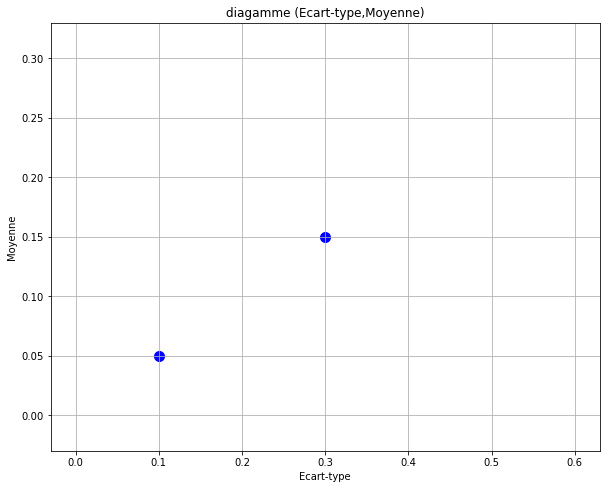

In [75]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
#plt.style.use('dark_background') # Pour un background noir

# On définit les caracteristiques des actifs
d=2
mu=[0.05,0.15]

# On choisit pour matrice de corrélation: des 1 sur la diagonale, des rho ailleurs
# rho=0 : cas d'actifs décorrélés (en particulier cas indépendant) 
rho=0.0
covariance=rho*np.ones([d,d])+(1-rho)*np.eye(d)

# On choisit les variances des actifs.
sigma=[0.10,0.30]
# On en déduit la matice de vairance-covariance
Gamma = np.matmul(np.diag(sigma),np.matmul(covariance,np.diag(sigma)))
# On peut aussi utiliser l'opérateur @ pour effectuer la multiplication matricelle
# Gamma = np.diag(sigma) @ covariance @ np.diag(sigma)


# Les caractéristiques des actifs de base
moyenne_actif=mu
std_actif=sigma

# plot ###################################################################
max_sigma=max(std_actif)
max_esp=max(moyenne_actif)
marge=0.03
un_inche_en_cm=2.54 # 1 inche = 2.54 cm

taille_h_cm=25
taille_v_cm=20

marker_size=100

def plot1():
    # On crée un figure dont on fixe la taille et dont on définit les axes
    fig = plt.gcf()
    fig.set_size_inches(taille_h_cm/un_inche_en_cm,taille_v_cm/un_inche_en_cm)
    plt.axis([-marge, 2*max_sigma+marge, -marge, 2*max_esp+marge])
    # On trace les points représentant les 2 actifs.
    plt.scatter(sigma,mu, s=marker_size, c='b',marker='o')
    plt.ylabel('Moyenne')
    plt.xlabel('Ecart-type')
    plt.title('diagamme (Ecart-type,Moyenne)')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.grid(True)

plot1()

---
<font color=red>Question 3:</font>
<br><font color='blue'>
Tracer la courbe $x_1\in [0,1] \to (\E(G_T),\sqrt{\Var(G_T)})$.  
Vérifier que l'on peut construire un portefeuille de même variance
que l'actif $1$ mais dont l'espérance du rendement est supérieure à
celle de cet actif. Est il rationnel d'investir dans l'actif $1$,
si l'on cherche à minimiser son risque ?
Quel sont les portefeuilles dans lesquels il paraît rationnel d'investir ?
</font>

---





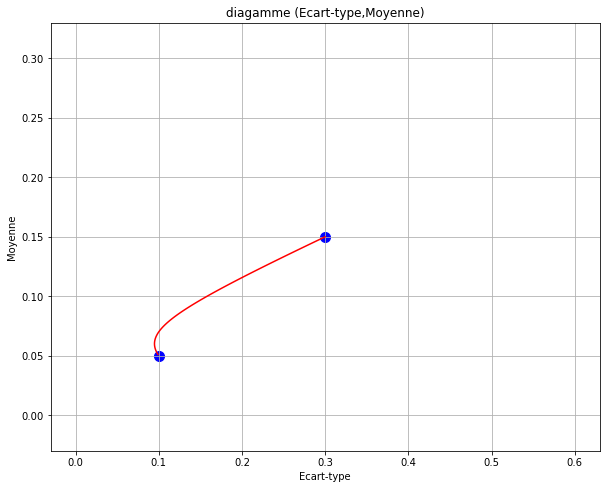

In [76]:
def frange(start, stop, step):
#exemple:
#for i in frange(0.5, 1.0, 0.1): print(i)
    i = start
    while i < stop:
        yield i
        i += step

####################
N=100
moyenne_x=np.zeros(N)
std_x=np.zeros(N)
i=0
for x_1 in frange(0.0,1.0,1.0/N):
    current_x = [x_1,1-x_1]  # composition du portefeuille  x_1 + x_2 = 1

    #DEBUTQUESTION
    ######  A vous de jouer  .....
    # moyenne_x[i] = ...   calcul de la moyenne du rendement du porfefeuille
    # std_x[i]= ...        calcul de son écart-type
    # np.dot(u,v) calcule le produit scalaire des vecteurs u et v
    # np.dot(M,v) calcule le produit matriciel de M et du vecteur v
    # math.sqrt(x) racine carrée de x
    #ENDQUESTION
    #DEBUTREPONSE
    moyenne_x[i] = np.dot(mu,current_x)
    std_x[i]=math.sqrt(np.dot(current_x,np.dot(Gamma,current_x)))
    #ENDREPONSE
    
    i=i+1
    
# plot ###################################################################
def plot2():
    plot1()# le plot précédent
    plt.plot(std_x,moyenne_x, 'r-')
    
plot2()

---
<font color=red>Question 4:</font>
<br><font color='blue'>
Vérifier que l'on peut construire un portefeuille de variance
  minimum (et inférieure à celle de l'actif de variance
  minimum). 
</font>

---

C'est un exemple de l'__effet de diversification__ dans
  la théorie des portefeuille.
 

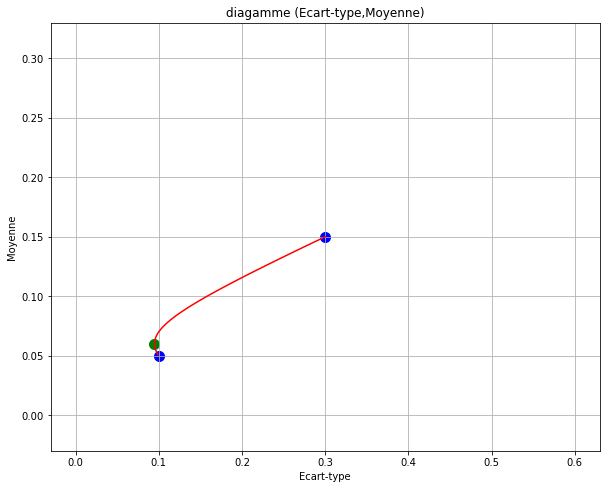

In [77]:
# plot ###################################################################
def plot3():
    plot2()# le plot précédent

    #DEBUTQUESTION
    ######  A vous de jouer  .....
    # calcul de l'indice du portefeuille de variance minimum
    # Vecteur.argmin() renvoit l'indice du plus petit nombre du Vecteur
    # imin = ...
    #ENDQUESTION
    #DEBUTREPONSE
    imin=std_x.argmin()
    #ENDREPONSE
    
    # on trace ce point en vert c='g' (couleur=vert)
    plt.scatter(std_x[imin],moyenne_x[imin], s=marker_size, c='g',marker='o')

plot3()

Nous relaxons la condition $x_1\geq 0$, $x_2\geq 0$ tout en
  continuant à imposer $x_1+x_2=1$ (la valeur totale de notre
  investissement initial reste égale à $1$). Nous allons faire varier
  $x_1$ entre $-10$ et $0$ (lorsque $x_1$ est négatif, on emprunte une
  quantité $|x_1|$ d'actif $1$, mais la valeur totale du portefeuille
  doit toujours rester égale à $1$).


---
<font color=red>Question 5:</font>
<br><font color='blue'>
 Tracer la courbe $x_1\in [-5,0] \to
 (\E(G_T),\sqrt{\Var(G_T)})$. Vérifier que, si l'on accepte une
 variance grande, on peut constituer des portefeuilles d'espérance
 aussi grande que souhaitée (cet effet porte le nom d'__effet de
   levier__ ou leverage effect). On comprend qu'il ne faille pas en
 abuser !
</font>

---


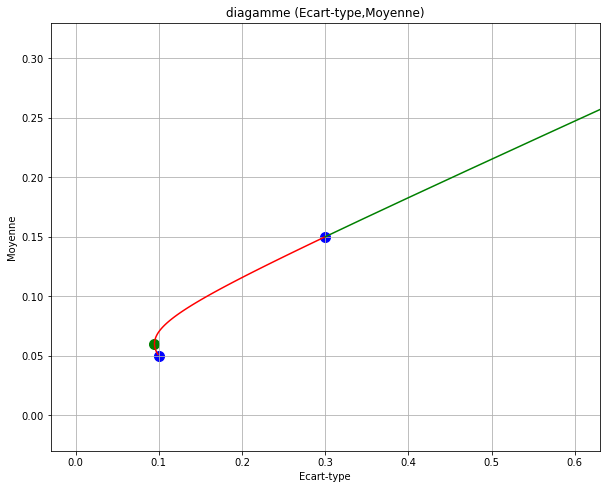

In [78]:
# On autorise l'emprunt de l'actif 1
N=1000
moyenne2_x=np.zeros(N)
std2_x=np.zeros(N)
for i in range(0,N):
  
    #DEBUTQUESTION
    ######  A vous de jouer  .....
    # prendre de valeurs negatives pour x_1 dans [-5,0], en déduire x_2
    # x_1 = - ...
    # x_2 = ...
    #ENDQUESTION
    #DEBUTREPONSE
    x_1= - 5*i/N
    x_2=1-x_1
    #ENDREPONSE
    
    # calcul de la moyenne et de l'écart-type de ce portefeuille
    x=[x_1,x_2]
    moyenne2_x[i]=np.dot(mu,x)
    std2_x[i]=math.sqrt(np.dot(x,np.dot(Gamma,x)))

# plot ###################################################################
def plot4():
    plot3()# le plot précédent
    plt.plot(std2_x, moyenne2_x,'g-')
    
plot4()

---
<font color=red>Question 6:</font>
<br><font color='blue'>
Tracer la courbe $x_2\in [-5,0] \to
 (\E(G_T),\sqrt{\Var(G_T)})$.
 Vérifier que lorsque l'on emprunte
 l'actif $2$ ($x_2$ négatif), l'on fait décroître l'espérance en
 augmentant la variance (ce qui est loin d'être optimal!).
</font>

---


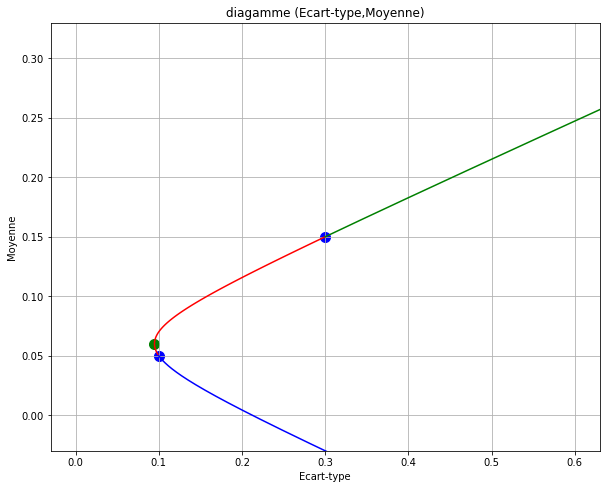

In [79]:
# Que se passe t'il lorsque l'on emprunte l'actif 2 ?
N=1000
moyenne3_x=np.zeros(N)
std3_x=np.zeros(N)
for i in range(0,N):

    #DEBUTQUESTION
    ######  A vous de jouer  .....
    # prendre de valeurs negatives pour x_2 dans [-5,0], en déduire x_1
    # x_2 = - ...
    # x_1 = ...
    #ENDQUESTION
    #DEBUTREPONSE
    x_2=-5*i/N
    x_1=1-x_2
    #ENDREPONSE

    x=[x_1,x_2]
    moyenne3_x[i]=np.dot(mu,x)
    std3_x[i]=math.sqrt(np.dot(x,np.dot(Gamma,x)))

# plot ###################################################################
def plot5():
    plot4() # le plot précédent
    plt.plot(std3_x, moyenne3_x,'b-')
    
plot5()

## Introduction d'un actif sans risque

 Nous allons introduire un nouvel actif, l'actif sans risque, qui
  comme son nom le suggère aura un rendement de variance nulle (ce qui
  implique que ce rendement n'est pas aléatoire). On supposera que ce
  rendement déterministe est inférieur à tous les rendements moyens
  des actifs risqués (pourquoi est-ce une hypothèse raisonnable?). On
  prendra, ici, ce rendement égal à $0$.

---
<font color=red>Question 7:</font>
<br><font color='blue'>
Construire le vecteur de moyenne et la matrice de variance-covariance de ce nouveau vecteur des rendements.
</font>

---

Gamma_d=
[[0.   0.   0.  ]
 [0.   0.01 0.  ]
 [0.   0.   0.09]]


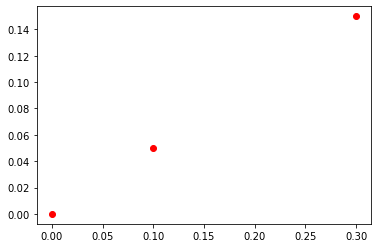

In [80]:
# Construction du vecteur des rendements.
# On rajoute un actif de rendement sans risque (de variance nulle).

# Pour la moyenne des rendements il suffit de rajouter le rendement sans risque
# au vecteur des rendements
r0=0
mu_d=np.append(r0,mu) #  moyenne de l'actif sans risque

# Pour la matrice de variance covariance
# on commence par construire la matrice de variance-covariance des actifs risqués
rho=0.0# -0.5
covariance=rho*np.ones([d,d])+(1-rho)*np.eye(d)
# La matrice de variance covariance se calcule par
#     (attention bien faire une multiplication matricielle et non terme à terme)
Gamma = np.matmul(np.matmul(np.diag(sigma),covariance), np.diag(sigma))
# si on préfère : Gamma = np.diag(sigma) @ covariance @ np.diag(sigma)

# Puis on rajoute l'actif non risqué. Comme le rendement est supposé deterministe, 
# la matrice de  variance covariance se compléte par une ligne et une colonne de 0
# la syntaxe python est assez impénétrable désolé ...
Gamma_d=np.vstack([np.zeros(d),Gamma])
Gamma_d=np.c_[np.zeros(d+1),Gamma_d]
print('Gamma_d=');print(Gamma_d)

# On rajoute 0 au vecteur des variances 
sigma_d=np.append(0,sigma) # variance (nulle) de l'actif sans risque

# Les vecteurs moyenne et variance des actifs
moyenne_actif=mu_d
std_actif=np.sqrt(np.diag(Gamma_d))

# On peut aussi materialise les 3 actifs de base
plt.plot(std_actif, moyenne_actif, 'ro')

On constitue des portefeuilles avec les 3 actifs (1 non risqué, 2
  risqués) en tirant au hasard des coefficients $(x_1,x_2,x_3)$ dans
  le simplexe $\left \{(x_1, x_2, x_3) \in \mathbb{R}^3 | \forall i\in \{1,2, 3\} \ 0 \leq x_i \leq 1 \ \text{et} \ x_1+x_2+x_3=1 \right \}$. 

La fonction `simplexe(d)` fait ce travail. 

In [81]:
def simplexe(d):
# Cette fonction tire "au hasard" de d nombre positifs
# de somme egale 1 (= dans le simplexe)
    t=np.random.rand(d-1)
    t=np.sort(t)[::-1]
    t=np.append(1,t)
    t=np.append(t,0)
    s=np.zeros(d)
    for i in range(d-1,-1,-1):
        s[i]=t[i]-t[i+1]
    return s

---
<font color=red>Question 8:</font>
<br><font color='blue'>
Matérialiser, en tirant un grand nombre de points au hasard, la nouvelle frontière efficiente. 
</font>
<br><font color='blue'>
Vérifier que :
  * La nouvelle frontière efficiente étend l'ancienne par de
    nouveaux points "non dominés" entre l'actif sans risque et un
    portefeuille tangent à l'ancienne frontière $P$.
  * La variance reste bornée par la variance la plus grande
    (tant que l'on ne fait pas d'emprunt).
</font>

---


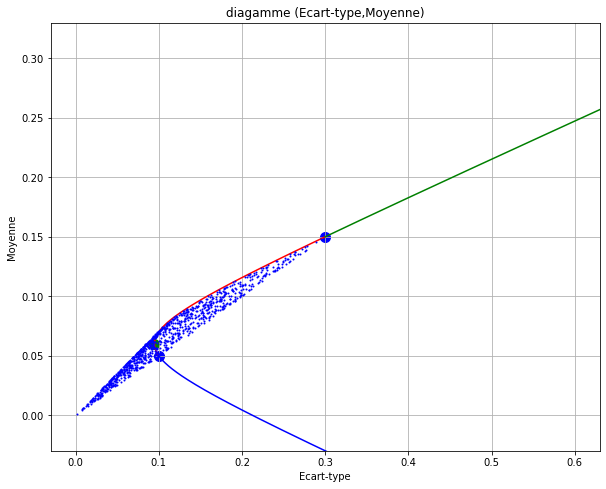

In [82]:
# On considère des portefeuilles *incluant l'actif sans risque*
# mais *sans emprunt*. On tire "au hasard" des portefeuilles 
# dans le simplexe de dimension 3
N=1000
moyenne_d_x=np.zeros(N)
std_d_x=np.zeros(N)
for i in range(0,N):
    # tirage au hasard dans le simplexe, d=2 et d+1=3 !
    #DEBUTQUESTION
    ######  A vous de jouer  .....
    #ENDQUESTION
    #DEBUTREPONSE
    x=simplexe(d+1)
    #ENDREPONSE
    
    # comme d'habitude, on calcule la moyenne et l'écart-type du portefeuille
    moyenne_d_x[i] = np.dot(mu_d,x)
    std_d_x[i]=math.sqrt(np.dot(x,np.matmul(Gamma_d,x)))

# plot ###################################################################
def plot6():
    plot5()# le plot précédent
    # On rajoute en bleu ('b') les points ('.') représentant 
    # les portefeuilles tirés au hasard
    plt.plot(std_d_x, moyenne_d_x,'b.',markersize=2)

plot6()

# Commentaire

On obtient de nouveaux points "non
  dominés" entre l'actif sans risque et un portefeuille tangent.  La
  variance reste bornée par la variance de l'actifs de plus grande
  variance tant que l'on n'emprunte pas.

On va identifier un portefeuille particulier $P$, le "portefeuille de
  marché".  $P$ est le portefeuille correspondant au point de
  tangence de la droite passant par l'actif sans risque et de
  l'ensemble de tous les portefeuilles a coefficients positifs de la
  question précédente.

  Le point $P$ est caractérisé par le fait qu'il maximise la pente des
  droites reliant le point $(\sigma_0=0, r_0=0)$ et les points
  correspondants à des portefeuilles $y$ ne faisant pas intervenir
  d'actif sans risque.



---
<font color=red>Question 9:</font>
<br><font color='blue'>
Toujours en procédant par simulation dans le simplexe, calculer $P$
  (en fait une approximation de $P$).

  Vérifier que le portefeuille $P$ fait intervenir les $2$ actifs
  risqués.
</font>

---


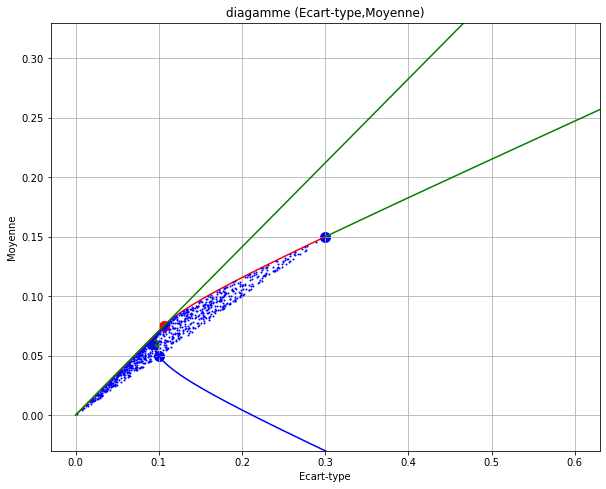

In [83]:
r0=mu_d[0]
sigma0=0

# On veut calculer le point P qui maximise la pente de la droite 
# entre (sigma0=0, x_0=r0) et les portefeuilles sans actif sans risque.
# Pour cela, on va genere des portefeuilles sans actifs sans risque
# et calculer le max des pentes ainsi obtenues.
N=1000
moyenne_y=np.zeros(N)
std_y=np.zeros(N)
pente=np.zeros(N)
max_pente=0
for i in range(1,N):
    y = np.array([0,i/N,1-i/N]) # on  rajoute O en actif sans risque
    # on calcule les moyennes et variances des portefeuilles y
    moyenne_y[i]=np.dot(mu_d,y)
    std_y[i]=math.sqrt(np.dot(y,np.matmul(Gamma_d,y)))

    #DEBUTQUESTION
    ######  A vous de jouer  .....
    # pente[i] = ....   pente associée au i-ième point
    #ENDQUESTION
    #DEBUTREPONSE
    pente[i]=(moyenne_y[i] - r0) / (std_y[i] - sigma0)# calcul de la pente
    #ENDREPONSE

# On calcule le point P maximise la pente
imax=pente.argmax()
x_P=moyenne_y[imax]
sigma_P=std_y[imax]

# plot ###################################################################
def plot7():
    plot6()# le plot précédent
    
    # Tracé du point P en rouge ('r')
    plt.scatter(sigma_P, x_P, s=marker_size, c='r', marker='o')

    # Tracé du segment "Actif sans risque -> P"
    plt.plot(np.array([sigma0,sigma_P]),np.array([r0,x_P]), 'r-')

    # Tracé de la droite "actif sans risque -> P" au dela de P
    lambd=(x_P-r0)/(sigma_P-sigma0)# pente de la droite
    sigma_infinity=2.0# arbitraire mais "grand"
    x_infinity=r0+lambd*(sigma_infinity-sigma0)
    plt.plot(np.array([sigma0,sigma_infinity]),np.array([r0,x_infinity]), 'g-')

plot7()

On autorise la détention d'une quantité de signe arbitraire
  d'actif sans risque (cela correspond soit à un emprunt, soit à un
  placement). Pour cela on vous suggère de tirer la quantité d'actif
  sans risque $x_0$ entre $[-4,1]$ (on peut emprunter jusqu'à $4$ fois
  ce que l'on possède). Puis on tire, les quantités d'actifs
  risqués uniformément sur le simplexe $\{x_1+x_2=1-x_0\}$.

---
<font color=red>Question 10:</font>
<br><font color='blue'>
  Tirer un grand nombre de portefeuille, calculer leurs moyennes et écarts-type,
  les tracer sur la figure.
</font>

---


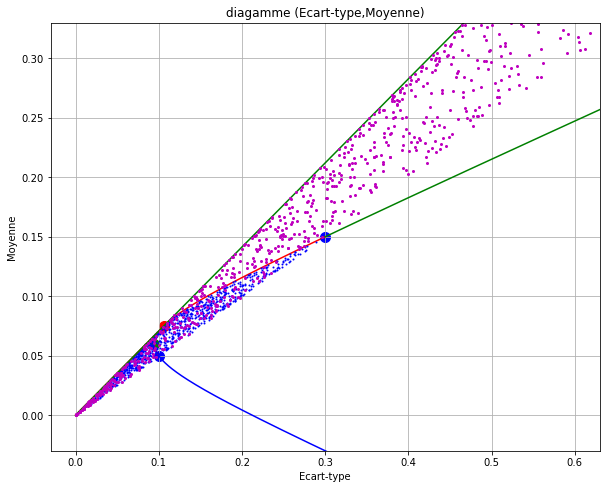

In [84]:
# L'emprunt en actif sans risque est autorisé
N=1000
moyenne_x_d=np.zeros(N+1)
std_x_d=np.zeros(N+1)
for i in range(1,N):
    # On génère des portefeuilles dont la quantité 
    # d'actif sans risque est uniforme sur [-4,1]
    x_0 = -4+ 5* np.random.rand(1)# x_0 dans [-4,1]
    s=simplexe(d)
    # tirage uniforme dans le simplexe de dim d (d=nbre actifs risqués, ici d=2).
    # On veut génèrer un portefeuille avec x_0 actifs sans risque
    # et de valeur totale |$x_0 + \sum_{i=1,\ldots,d} x_i = 1$|.
    x=np.append(x_0,(1-x_0)*s) # |$x_0 + (1- x_0) \sum_{i=1,\ldots,d} s_i = 1$|  

    moyenne_x_d[i]= np.dot(mu_d,x)
    std_x_d[i]=math.sqrt(np.dot(x, np.matmul(Gamma_d,x)))

# plot ###################################################################
def plot8():
    plot7()# le plot précédent

    # Tracé des points tirés au hazard    
    plt.plot(std_x_d,moyenne_x_d,'mo',markersize=2)

plot8()

---
<font color=red>Question 11:</font>
<br><font color='blue'>
  Vérifier que:
  1. l'on obtient de nouveaux points "non dominés" au delà du
    portefeuille tangent.
  2. le rendement (mais aussi la variance) peut devenir aussi
    grand que souhaité: __effet de levier__.
  3. un emprunt permet de construire des portefeuilles dont la
    moyenne des rendements est plus élevée à variance égale:
      __emprunter permet d'augmenter la moyenne du rendement__.
  4. l'emprunt permet de construire des portefeuilles de même
    moyenne mais de variance inférieure: __emprunter permet de
      réduire le risque__.  Il existe en particulier un portefeuille
    dont la variance est égale à celle de l'actif 2 (l'actif de
    rendement maximum) mais de rendement supérieur.
  5. le seul point de la "frontière sans emprunt" qui n'est pas
    dominé par un point de la "frontière avec emprunt" est le point
    $P$: si l'on ne souhaite pas emprunter, "le seul point
      rationnel est" $P$.
  6. le portefeuille $P$ fait intervenir l'ensemble des actifs de
    base risqués (en dehors des actifs de base dominés par d'autres
    actifs de base).
</font>

---




# Partie optionnelle: extensions du modèle à plus de 2 actifs risqués

Le modèle de Markowitz vient d'être illustré dans le cas où l'on considère deux actifs risqués décorrélés ($\rho=0$)
et un actif sans risque. On peut évidemment généraliser l'approche au cas d'actifs corrélés et en faisant intervenir
un nombre arbitraire d'actifs.

## 1. Le cas d'un corrélation non nulle

---
<font color=red>Question 12:</font>
<br><font color='blue'>
Recommencer l'expérience précédente avec des valeurs de $\rho$
  non nulle.  Prendre par exemple 
$$
\rho=-0.5\quad\mbox{et}\quad \rho=0.5
$$ 
</font>

---

Les scripts précédents fonctionnent dans ce cas. Nous vous laissons le soin d'expérimenter par vous même.

In [85]:
# Matrice de covariance: des 1 sur la diagonale, des rho ailleurs
rho=0.5# -0.5
covariance=rho*np.ones([d,d])+(1-rho)*np.eye(d)
Gamma = np.matmul(np.matmul(np.diag(sigma),covariance), np.diag(sigma))
# etc ...


## 2. Le cas d'un nombre  d'actifs risqués arbitraires

Lorsque $d>2$ les phénomènes sont identiques mais moins explicites. On
peut recommencer ce qui précède mais il faudra généraliser le choix de
la matrice de variance covariance et procéder par simulation dans tous
les cas.

Les programmes fournis en correction fonctionnent (le plus souvent) en 
dimension arbitraire.

A titre indicatif voici un exemple du cas $d=3$. 

##### Etape 1. Choix des actifs de base.

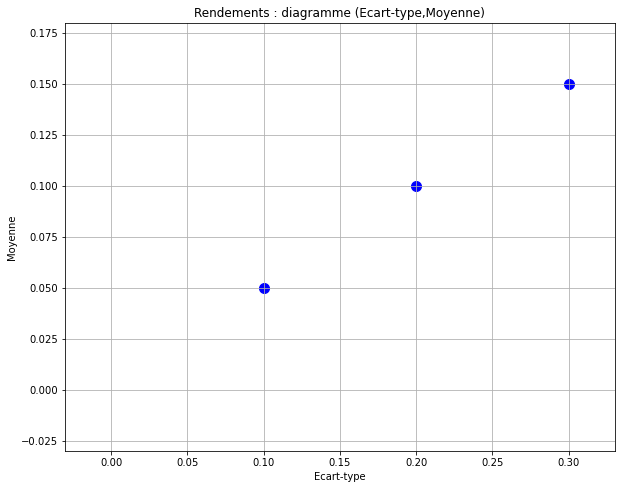

In [86]:
# On définit les caracteristiques des actifs risqués
d=3
rho=0.0

min_esp=0.05
max_esp=0.15
mu=np.linspace(min_esp,max_esp,d)

# On suppose que tous les actifs risqués ont une 
# corrélation constante égale à |$\rho$|.
# On doit forcement avoir |$\rho >= -(1/(d-1))$|, 
# sinon la matrice n'est pas une matrice de covariance (exercice!).
covariance=rho*np.ones([d,d])+(1-rho)*np.eye(d)

# On choisit un ecart type croissant en fonction de l'actif
min_sigma=0.1
max_sigma=0.3
sigma=np.linspace(min_sigma,max_sigma,d)

# La matrice de variance covariance se calcule par :
Gamma = np.diag(sigma) * covariance * np.diag(sigma)

# Les caractéristiques des actifs de base
moyenne_actif=mu
std_actif=np.sqrt(np.diag(Gamma))

# plot ###################################################################

# Tracé des actifs dans le plan (ecart-type,moyenne)
max_sigma=max(std_actif)
max_esp=max(moyenne_actif)
marge=0.03
un_inche_en_cm=2.54 # 1 inche = 2.54 cm

taille_h_cm=25
taille_v_cm=20

def plot2_1():
    # On crée un figure dont on fixe la taille et dont on définit les axes
    fig = plt.gcf()
    fig.set_size_inches(taille_h_cm/un_inche_en_cm,taille_v_cm/un_inche_en_cm)
    plt.axis([-marge, max_sigma+marge, -marge, max_esp+marge])
    # On trace les points représentant les actifs de risqués
    plt.scatter(sigma,mu, s=marker_size, c='b', marker='o')
    plt.ylabel('Moyenne')
    plt.xlabel('Ecart-type')
    plt.title('Rendements : diagramme (Ecart-type,Moyenne)')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.grid(True)


plot2_1()


#####  Etape 2. Tirages des portefeuilles à coefficients positifs.

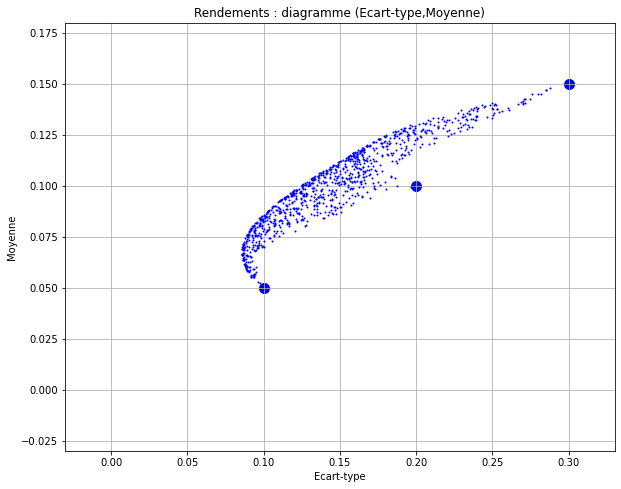

In [87]:
# On considère des portefeuilles *avec l'actif sans risque*
# mais *sans emprunt*. On les tire au hasard dans le simplexe
# de dimension 3
N=1000
moyenne1_d_x=np.zeros(N)
std1_d_x=np.zeros(N)
for i in range(0,N):
    x=simplexe(d)# tirage au hasard dans le simplexe
    moyenne1_d_x[i] = np.dot(mu,x)
    std1_d_x[i]=math.sqrt(np.dot(x,np.matmul(Gamma,x)))

# plot ###################################################################
def plot2_2():
    plot2_1()# le plot précédent
    plt.plot(std1_d_x, moyenne1_d_x,'b.',markersize=2)

plot2_2()

    On peut estimer la frontière efficiente à partir de ces tirages. Il suffit de ne garder que les
    points non dominés parmis les tirages.

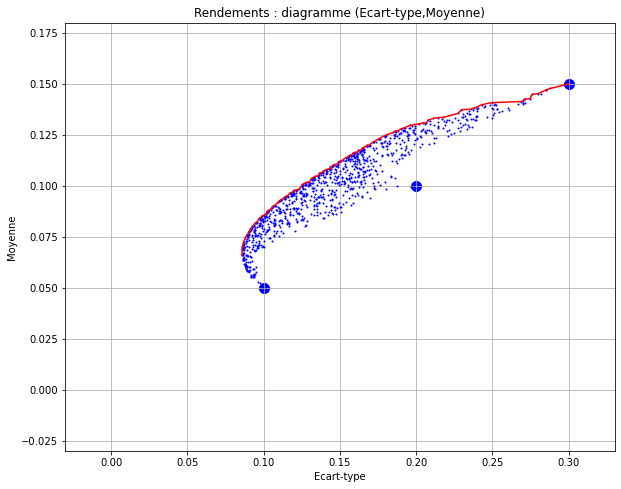

In [88]:
def frontiere_efficiente(moyenne_x,std_x):
# Calcule la fontiere efficiente
# a partir des points de R^2 ((moyenne_x(i),std_x(i)),1<=i<=N)

    # On rajoute l'actif de moyenne et de variance maximum
    # pour avoir de plus jolis dessins !
    moyenne_x=np.append(moyenne_actif[np.size(moyenne_actif)-1],moyenne_x)
    std_x=np.append(std_actif[np.size(moyenne_actif)-1],std_x)

    liste=[] # indices des point de la frontiere courante, vide au debut
    N=moyenne_x.size
    for i in range(N): # on parcours les points
        bool=False
        # On regarde si on trouve un point de la frontiere courante
        # qui majore le point courant
        for j in range(len(liste)):
            if (moyenne_x[liste[j]] > moyenne_x[i]) & (std_x[liste[j]] < std_x[i]):
                bool=True
                break        
        if bool:
            # si on a trouve un point de la frontiere courante
            # qui majore le point courant, il n'y a rien a faire, 
            # la frontiere est a jour.
            pass
        else:
            # sinon on rajoute le point et on enleve tous les points qu'il domine
             # On identifie les points a enlever
            removeliste=[]
            for j in liste:
                if ((moyenne_x[j] <  moyenne_x[i]) & (std_x[j] > std_x[i])):
                     removeliste.append(j)               
            # On enleve ces points
            for j in removeliste: liste.remove(j)    
            liste.append(i) # on rajoute le point
            
    # on trie les points en fonction de la première coordonnée
    frontiere_m=moyenne_x[liste]
    frontiere_s=std_x[liste]
    L = [ (frontiere_m[i],i) for i in range(len(frontiere_m)) ]
    L.sort(); sorted_l,permutation = zip(*L)
    for i in range(len(frontiere_m)):
        frontiere_m[i]=moyenne_x[liste[permutation[i]]]
        frontiere_s[i]=std_x[liste[permutation[i]]]
    return [frontiere_m,frontiere_s]
    
def plot2_3():
    plot2_2();# le plot précédent
    [frontiere_m_1,frontiere_s_1] = frontiere_efficiente(moyenne1_d_x,std1_d_x) # calcul de la frontière
    plt.plot(frontiere_s_1, frontiere_m_1,'r-',markersize=2)
    
plot2_3()

#### Etape 3. Le point de variance minimum.

Text(0.01580479081196745, 0.03596119917150335, 'Portefeuille de\nvariance minimale')

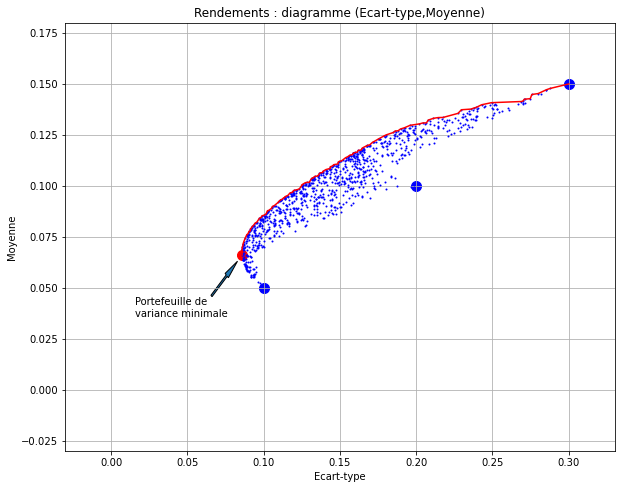

In [89]:
# Le point de variance minimum
imin=std1_d_x.argmin()

# plot ###################################################################
def plot2_4():
    plot2_3()# le plot précédent
    plt.scatter(std1_d_x[imin],moyenne1_d_x[imin], s=marker_size, c='r',marker='o')

plot2_4()
dx=0.01;dy=0.01
plt.arrow(std1_d_x[imin]-2*dx, moyenne1_d_x[imin]-2*dy, dx, dy,shape='full',head_length=0.01)
plt.text(std1_d_x[imin]-0.07, moyenne1_d_x[imin] - 3*dy,'Portefeuille de\nvariance minimale')


####  Etape 4. On autorise l'emprunt de l'actif 1

In [90]:
def arbitraire(d,sigma): 
# tirages de valeurs de signe arbitraire
# dont la somme vaut 1
#  -> l'emprunt est autorisé 
    t=np.random.normal(0,sigma,d-1)
    n=np.random.randint(d-1)
    s=np.zeros(d)
    s[0:n]=t[0:n]
    s[n]=1-np.sum(t)
    s[n+1:d]=t[n:d-1]
    return s
  

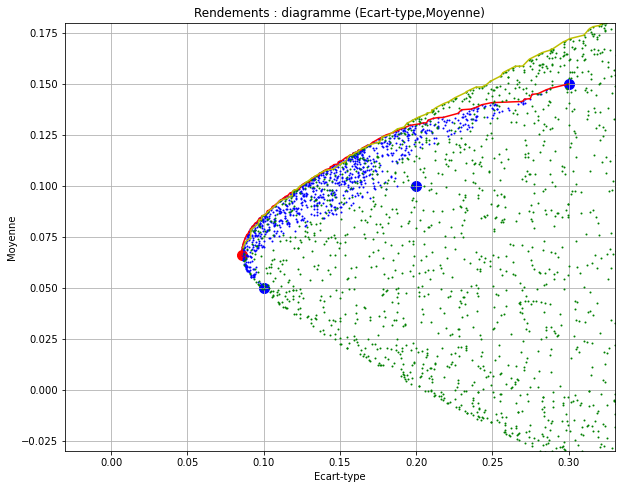

In [91]:
N=10000
moyenne2_d_x=np.zeros(N)
std2_d_x=np.zeros(N)
sigma_e=2
for i in range(0,N):
    x=arbitraire(d,sigma_e)
    moyenne2_d_x[i] = np.dot(mu,x)
    std2_d_x[i]=math.sqrt(np.dot(x,np.matmul(Gamma,x)))

# plot ###################################################################
def plot2_5():
    plot2_4()# le plot précédent
    plt.plot(std2_d_x, moyenne2_d_x,'g.',markersize=2)
    [frontiere_m_2,frontiere_s_2] = frontiere_efficiente(moyenne2_d_x,std2_d_x)
    plt.plot(frontiere_s_2, frontiere_m_2,'y-',markersize=2)

plot2_5()

#### Etape 5. On rajoute un actif sans risque de redement moyen nul.

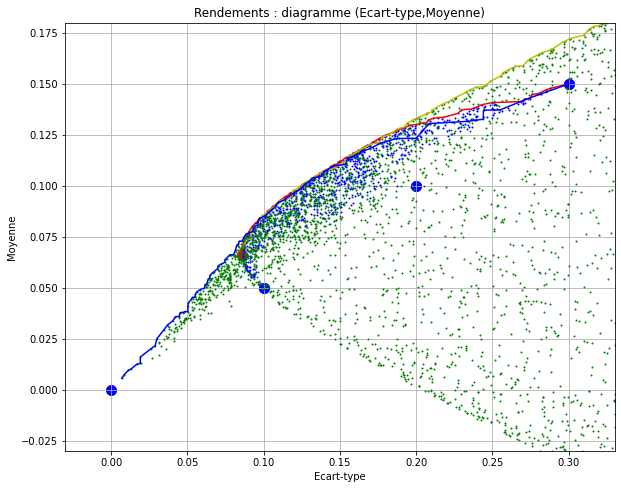

In [92]:

# On rajoute un actif sans risque de moyenne nulle
r0=0
mu_d=np.append(r0,mu)
sigma_d=np.append(0,sigma)

rho=0.0# -0.5
covariance=rho*np.ones([d,d])+(1-rho)*np.eye(d)
Gamma = np.matmul(np.matmul(np.diag(sigma),covariance), np.diag(sigma))

# comme ce rendement est suppose deterministe, la matrice de  
# variance covariance se complete par une ligne et une colonne de 0
Gamma_d=np.vstack([np.zeros(d),Gamma])
Gamma_d=np.c_[np.zeros(d+1),Gamma_d]

moyenne_actif=mu_d
std_actif=np.sqrt(np.diag(Gamma_d))


# On considère des portefeuilles *avec l'actif sans risque*
# mais *sans emprunt*. On les tire au hasard dans le simplexe
# de dimension 3+1
N=1000
moyenne3_d_x=np.zeros(N)
std3_d_x=np.zeros(N)
for i in range(0,N):
    x=simplexe(d+1)# tirage au hasard dans le simplexe
    moyenne3_d_x[i] = np.dot(mu_d,x)
    std3_d_x[i]=math.sqrt(np.dot(x,np.matmul(Gamma_d,x)))

# plot ###################################################################
def plot2_6():   
    plot2_5()
    fig = plt.gcf()
    fig.set_size_inches(taille_h_cm/un_inche_en_cm,taille_v_cm/un_inche_en_cm)
    plt.axis([-marge, max_sigma+marge, -marge, max_esp+marge])

    # On materialise les 3+1 actifs de base
    plt.scatter(std_actif, moyenne_actif, s=marker_size, c='b', marker='o')

    # et les portefeuilles tirés au hasard
    plt.plot(std3_d_x, moyenne3_d_x,'g.',markersize=2)
    
    plt.ylabel('Moyenne')
    plt.xlabel('Ecart-type')
    plt.title('Rendements : diagramme (Ecart-type,Moyenne)')
    #plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
    plt.grid(True)
    [frontiere_m_3,frontiere_s_3] = frontiere_efficiente(moyenne3_d_x,std3_d_x)
    plt.plot(frontiere_s_3, frontiere_m_3,'b-',markersize=2) 

plot2_6()


#### Etape 6. Identification du portefeuille de marché et de la droite de marché.

Text(0.024709075412385817, 0.11200397763175395, 'Portefeuille de\nmarché')

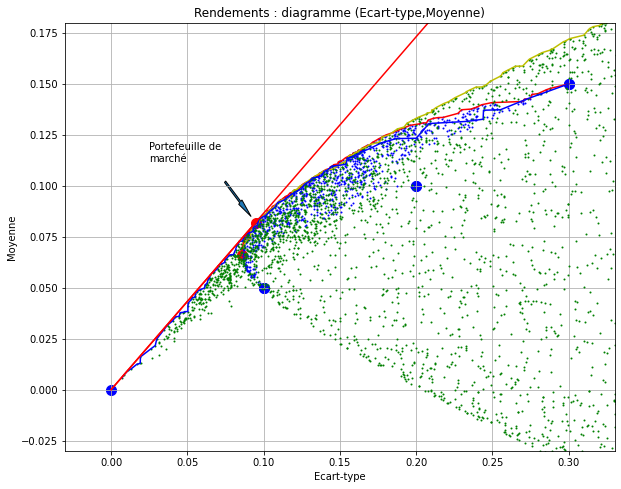

In [93]:
# r0=mu_d[0]
sigma0=math.sqrt(Gamma_d[0,0])# sigma0 = Gamma(0,0) = 0

# Calcul du point P qui maximise la pente de la droite 
# entre (sigma0=0, x_0=r0) et les portefeuilles
# (ne faisant pas intervenir d'actif sans risque)
N=1000
moyenne_d_x=np.zeros(N)
std_d_x=np.zeros(N)
pente=0
max_pente=0

for i in range(0,N):
    # tirage au hasard du portefeuille
    # dans le simplexe de dimension d. 
    # On rajoute 0 comme quantité d'actif sans risque 
    # car on ne considere dans la maximisation que 
    # des portefeuilles sans actif sans risque
    x=np.append(0,simplexe(d))
    moyenne_d_x[i] = np.dot(mu_d,x)
    std_d_x[i]=math.sqrt(np.dot(x,np.matmul(Gamma_d,x)))
    pente=(moyenne_d_x[i] - r0) / (std_d_x[i] - sigma0)# calcul de la pente
    max_pente=max(pente,max_pente)
    if max_pente==pente:
        imax=i

# Le point P maximise la pente de la droite entre (sigma0=0, x_0=r0) 
# et les portefeuilles y (sans actif sans risque)
x_P=moyenne_d_x[imax]
sigma_P=std_d_x[imax]

# plot ###################################################################
def plot2_7():
    plot2_6()# le plot précédent

    # Tracé du point P
    plt.scatter(sigma_P, x_P, s=marker_size, c='r', marker='o')

    # Tracé du segment "Actif sans risque -> P"
    plt.plot(np.array([sigma0,sigma_P]),np.array([r0,x_P]), 'r-')

    # Tracé de la droite "actif sans risque -> P" au dela de P
    lambd=(x_P-r0)/(sigma_P-sigma0)# pente de la droite
    sigma_infinity=2.0# arbitraire mais "grand"
    x_infinity=r0+lambd*(sigma_infinity-sigma0)
    plt.plot(np.array([sigma0,sigma_infinity]),np.array([r0,x_infinity]), 'r-')

plot2_7()
# annotation pour le portefeuille de marché
dx=0.01;dy=0.01
plt.arrow(sigma_P-2*dx, x_P+2*dy, dx, -dy,shape='full',head_length=0.01)
plt.text(sigma_P-0.07, x_P + 3*dy,'Portefeuille de\nmarché')


#### Etape 7. Simulation de portefeuilles avec emprunt autorisé

Avec actif sans risque et emprunt autorisé. On tire au hasard
  sans imposer le signe de l'actif sans risque mais en gardant 
  la quantité de tous les actifs risqués positif. C'est fait par 
  la primitive arbitraire(d,sigma_e) qui fait un choix
  (arbitraire) pour la loi de la quantité d'actif sans risque.

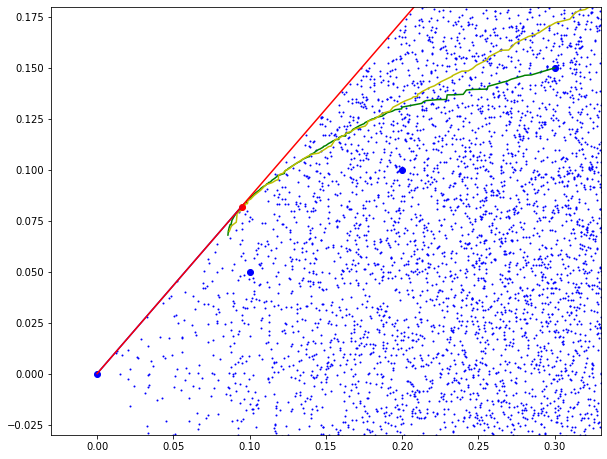

In [94]:
N=50000
sigma_e=2.0
moyenne4_d_x=np.zeros(N)
std4_d_x=np.zeros(N)
for i in range(0,N):
    x=arbitraire(d+1,sigma_e)# tirage au hasard dans le simplexe
    moyenne4_d_x[i] = np.dot(mu_d,x)
    std4_d_x[i]=math.sqrt(np.dot(x,np.matmul(Gamma_d,x)))

# plot ###################################################################
def plot2_8():    
    #plot2_7()
    
    fig = plt.gcf()
    fig.set_size_inches(taille_h_cm/un_inche_en_cm,taille_v_cm/un_inche_en_cm)
    plt.axis([-marge, max_sigma+marge, -marge, max_esp+marge])

    # On materialise les 4 actifs de base
    plt.plot(std_actif, moyenne_actif, 'bo')

    # les portefeuilles tirés au hasard
    plt.plot(std4_d_x, moyenne4_d_x,'b.',markersize=2)
    
    # la frontière sans aucun emprunt
    [frontiere_m_1,frontiere_s_1] = frontiere_efficiente(moyenne_d_x,std_d_x)
    plt.plot(frontiere_s_1, frontiere_m_1,'-g',markersize=2)
    
    # la frontière où l'on peut emprunter l'actif 1
    [frontiere_m_2,frontiere_s_2] = frontiere_efficiente(moyenne2_d_x,std2_d_x)
    plt.plot(frontiere_s_2, frontiere_m_2,'y-',markersize=2)
        
    # La frontière définie par la droite de marché où l'on peut emprunter l'actif sans risque
    plt.plot(sigma_P, x_P, 'ro')
    plt.plot(np.array([sigma0,sigma_P]),np.array([r0,x_P]), 'b-')
    lambd=(x_P-r0)/(sigma_P-sigma0)# pente de la droite
    sigma_infinity=2.0# arbitraire mais "grand"
    x_infinity=r0+lambd*(sigma_infinity-sigma0)
    plt.plot(np.array([sigma0,sigma_infinity]),np.array([r0,x_infinity]), 'r-')

plot2_8()


On peut vérifier que tous les portefeuilles restent en dessous de la droite de marché.

Ce programme est paramétrable pour des valeurs de $d$ et $\rho$
arbitraires, si vous souhaitez expérimenter par vous même. Toutefois
des problèmes d'échantillonage se pose lorsque $d$ devient grand (au
delà de $5$, la loi uniforme sur le simplexe  "a du mal à visiter les
coins du simplexe", c'est une réalité géométrique incontournable).

## Partie optionnelle: solution des problèmes d'optimisation associés

Les complèments qui suivent sont optionnels. Ils montrent cmment calculer par diverses méthodes la frontière 
efficiente ainsi que le portefeuille de marché.

### Calcul du portefeuille de marché par optimisation

 Le calcul du portefeuille de marché $P$, s'exprime sous la forme
  d'un problème d'optimisation avec contrainte.

  Ce poblème se résout avec des techniques classiques implémentées
  dans __Python__ et qui utilisent vos cours d'optimisation de 1A
  (passé) et de 2A (futur!).

  La fonction _minimize_ de _scipy_ minimise une fonction, si
  on lui fournit une fonction _cost_ qui renvoie la valeur du coût ainsi que de
  la dérivée du coût en fonction des paramètres. $x_0$ est la
  valeur initiale de l'algorithme. _minimize_  renvoie la valeur de l'optimum
  dans f et le minimiseur dans _xopt_.

In [95]:
from scipy.optimize import minimize

# Choix des caracteristiques des actifs sans risque
d=3
rho=0.0
min_esp=0.05;max_esp=0.15
mu=np.linspace(min_esp,max_esp,d)
min_sigma=0.1;max_sigma=0.3
sigma=np.linspace(min_sigma,max_sigma,d)
correlation =rho*np.ones([d,d])+(1-rho)*np.eye(d)
Gamma = np.diag(sigma) * correlation * np.diag(sigma)

# Définition de la fonction de coût et de sa dérivée
# en utilisant la contrainte |$\sum_{i=1}^d \lambda_i=1$|
def cost(x):
    # On maximise 
    #       f = (mu*lambd)^2 / lambd'*Gamma*lambd
    # sous la contrainte |$\sum_{i=1}^d \lambda_i=1$|, |$x=\lambd(2:d)$|
    # x_1 est calculé en fonction de |$\lambd$| à partir de x(2:d)
    # en utilisant la contrainte |$\sum_{i=1}^d \lambd_i = 1$|
    lambd=np.append(1-sum(x),x)
    ps=np.dot(mu,lambd)
    var=np.dot(lambd, np.matmul(Gamma,lambd))
    # On cherche à minimiser (lambd.mu)^2 / lambd'.Gamma.lambd   
    f = ps*ps / var
    return -f # On maximise mais Python suppose que l'on minimise ...

def cost_der(x):
    # le dérivée du coût en fonction de lambda
    # x_1 est calculé en fonction de |$\lambd$| à partir de x(2:d)
    # en utilisant la contrainte |$\sum_{i=1}^d \lambd_i = 1$|
    lambd=np.append(1-sum(x),x)
    ps=np.dot(mu,lambd)
    var=np.dot(lambd, np.matmul(Gamma,lambd))
    k=(2*ps/var)*mu - (2*ps*ps/(var*var)*np.matmul(np.transpose(lambd),Gamma))
    # Calcul de la dérivée par rapport a |$x$| 
    # en fonction de la derivee en |$\lambda$|.
    p=np.size(x)+1# dimension de |$\lambda = 1+dim(x)$|
    g=k[1:p]-k[0]
    return -g # On maximise mais Python suppose que l'on minimise ...

x0=np.ones(d-1)/d
xopt = minimize(cost, x0, method='BFGS', jac=cost_der, options={'disp': True})
Xopt=np.append(1-sum(xopt.x),xopt.x)
Fopt=math.sqrt(-xopt.fun)

# Est on bien entre |$0$| et |$1$| ? C'est toujours le cas pour 
# Rho diagonale mais pas toujours dans le cas non diagonal
# ok = and(0<=Xopt) & and(Xopt<=1)

# Lorsque rho=0, il y a une solution explicite (exercice)
# lambda_i = alpha * mu_i/sigma_i^2, renormalisé
# On verifie ...
sigma=np.transpose(np.sqrt(np.diag(Gamma)))
x= np.divide(mu, np.multiply(sigma,sigma))
x=x/np.sum(x)# normalisation
x=np.transpose(x)
print('Lorsque rho=0, vérfiez que ce qui suit est petit, sinon vous avez un problème ...')
print(np.linalg.norm(x - Xopt)) # lorsque la matrice Rho est diagonale 
                          # ça devrait etre petit


Optimization terminated successfully.
         Current function value: -0.750000
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11
Lorsque rho=0, vérfiez que ce qui suit est petit, sinon vous avez un problème ...
1.6104417260799285e-07


### Calcul numérique de la frontière efficiente (Work in progress !)

La frontière efficiente peut se calculer en résolvant une famille de
problème d'optimisation classique~: minimisation de variance à espérance fixée
et/ou maximisation d'espérance à variance fixée.

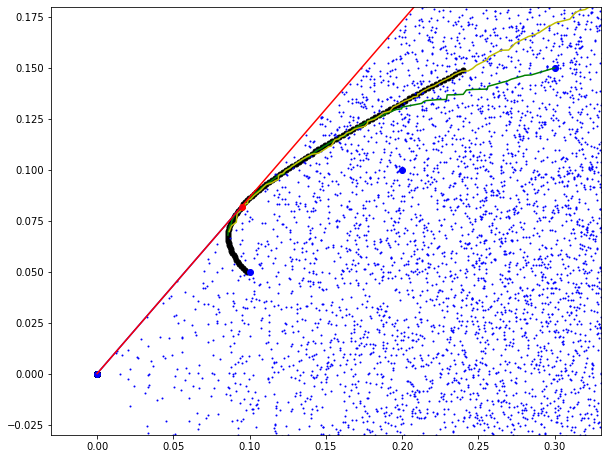

In [96]:
def x2lambda(x,R,mu):
    # construction de lambda a partir de x
    # en tenant compte des contraintes |$\sum_i \lambda_i  =1$|, |$r^T \lambda = R$|
    p=np.size(x)+2# dimension de lambda = 2+dim x
    alpha0=1-np.sum(x)
    beta0=R-np.matmul(mu[0:p-2],x)
    lambda_n_1 = (mu[d-1]*alpha0 - beta0) / (mu[d-1] - mu[d-2])
    lambda_n = (beta0 - mu[d-2] * alpha0) / (mu[d-1] - mu[d-2])
    lambd=np.append(np.append(x,lambda_n_1),lambda_n)
    return lambd

def cost(x):
# On minimise la variance 
#       f = lambda'*Gamma*lambda
# sous les contraintes |$\sum(\lambda)=1$|, |$r^T \lambda = R$|
    p=np.size(x)+2# dimension de lambda = 2+dim x
    lambd=x2lambda(x,R,mu)
    k=np.matmul(Gamma,lambd)# derive en fonction de lambda
    lambd = np.transpose(lambd)
    f = np.matmul(lambd,k)
    return f

def cost_der(x):
# On minimise la variance 
#       f = lambda'*Gamma*lambda
# sous les contraintes |$\sum(\lambda)=1$|, |$r^T \lambda = R$|
    p=np.size(x)+2# dimension de lambda = 2+dim x
    lambd=x2lambda(x,R,mu)
    k=np.matmul(Gamma,lambd)# derive en fonction de lambda
    g = np.zeros(p-2)
    for i in range(0,p-2):
        # derivee par rapport a x (et non lambd)
        g[i]=k[i] + (k[p-2] * (- mu[p-1] + mu[i]) + k[p-1] * (- mu[i] + mu[p-2])) / (mu[p-1] - mu[p-2])
    return g


# Choix des caracteristiques des actifs sans risque
# Même remarque que pour la cellule précédente
# d=3
# rho=-0.2
# min_esp=0.05;max_esp=0.15
# mu=np.linspace(min_esp,max_esp,d)
# min_sigma=0.1;max_sigma=0.3
# sigma=np.linspace(min_sigma,max_sigma,d)
# correlation =rho*np.ones([d,d])+(1-rho)*np.eye(d)
# Gamma = np.diag(sigma) @ correlation @ np.diag(sigma)

x0=np.ones(d-2)/d
i=0
abscisse=np.zeros(1000)
ordonnee=np.zeros(1000)

for R in frange(0.05,0.15,0.001):
    xopt=minimize(cost, x0, method='BFGS', jac=cost_der, options={'disp': False})
    # options={'disp': True} pour voir le résultat de l'optimisation
    Xopt=x2lambda(xopt.x,R,mu)
    i=i+1
    abscisse[i]=math.sqrt(xopt.fun)
    ordonnee[i]=R

def plot2_9(): 
    plot2_8()
    plt.scatter(abscisse,ordonnee, color='black', s=25)

plot2_9()

### Calcul explicite de la frontière efficiente

Toujours en ignorant les contraintes de positivités, on peut
obtenir une forme quasi explicite pour la frontière de Pareto, en utilisant
deux multiplicateurs de Lagrange (l'un pour $\sum_{i=1}^d \lambda_i=1$, l'autre
pour $\sum_{i=1}^d \mu_i \lambda_i = r$).

On obtient après quelques calculs simples, si
$$
  A=\mu' \Sigma^{-1} \mu,\; B=\mu' \Sigma^{-1} {\mathbf 1},\; C=
  {\mathbf 1}' \Sigma^{-1} {\mathbf 1}, \;D= AC - B^2,
$$
la paramètrisation suivante de la frontière de Pareto,
$(\lambda'\mu,\lambda'\Sigma\lambda)$ où $\lambda$ est la fonction de $r$ suivante:
$$
  \lambda=\frac{BC}{D} \left(r - \frac{B}{C}\right) (\lambda_\mu -
  \lambda_g) + \lambda_g,
$$
où $\lambda_g = \Sigma^{-1} {\mathbf 1}/C$ et
$\lambda_\mu = \Sigma^{-1} \mu/B$. On peut vérifier que seule la
partie de cette courbe correspondant à $r \geq \frac{B}{C}$
appartient à la frontière de Pareto.

On pourra se convaincre que $\lambda_g$ est le point qui __minimise__ 
la variance des portefeuilles sous la seule contrainte
que $\sum_{i=1}^d \lambda_i=1$ et que $\lambda_\mu$ est le point qui
__maximise__ le ratio de Sharpe
$\mu' \lambda / \sqrt{\lambda' \Sigma \lambda}$ sous la même
contrainte (utiliser Cauchy-Schwartz pour s'en convaincre).

Voir T.J. Brennan and A.W. Lo, 2010, "Impossible frontiers" ou Merton, R., 1972, "An analytic derivation of the    
Efficient Portfolio Frontier".